**Business Objective**

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

# Fetching Train and Test Files

In [1]:
!pip install sklearn==0.0.post1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5cfc537da8cd52021e183eb405157c47dcc3ce5f9931a1836d4b3efcc439fa94
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
import numpy as np
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/fourthbrain

dog_dataset				Train_Beneficiarydata-1542865627584.csv
Test-1542969243754.csv			Train_Inpatientdata-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv	Train_Outpatientdata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv	tweets.csv.gz
Test_Outpatientdata-1542969243754.csv	twitter-mask.png
Train-1542865627584.csv


In [6]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'

train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

# Data Engineering on Beneficiary Dataset

In [7]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [8]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [9]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [10]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [11]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [12]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [13]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [14]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [15]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

## Person's Age on Train dataset

In [16]:
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

In [17]:
train_beneficiary_df['Age'].isna().sum(), train_beneficiary_df.shape[0]

(137135, 138556)

**Take-away message**

There are 1421 beneficiaries still alive and we need to calculate their age as well. 

In [18]:
train_beneficiary_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

**Take-away message**
Beneficiary data was last recorded on 2009-12-01, so we can calculate age of people that are still alive based on this date. 

In [19]:
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)

In [20]:
train_beneficiary_df.Age.isna().sum()

0

## Person's Age on Test dataset

In [21]:
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

In [22]:
test_beneficiary_df['Age'].isna().sum(), test_beneficiary_df.shape[0]


(63394, 63968)

In [23]:
63968 - 63394 

574

**Take-away message**

In the test dataset, there are 574 beneficiaries that are still alive. We'll calculate their age based on the last recorded date. 

In [24]:
test_beneficiary_df['DOD'].max()


Timestamp('2009-12-01 00:00:00')

In [25]:
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


In [26]:
test_beneficiary_df.Age.isna().sum()


0

## Add dead flag column

In [27]:
train_beneficiary_df.shape

(138556, 26)

In [28]:
train_beneficiary_df['DOD'].isna().sum(), train_beneficiary_df['DOD'].notna().sum()

(137135, 1421)

In [29]:
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [30]:
train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64

In [31]:
test_beneficiary_df.shape

(63968, 26)

In [32]:
test_beneficiary_df['DOD'].isna().sum(), test_beneficiary_df['DOD'].notna().sum()


(63394, 574)

In [33]:
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [34]:
test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

# Data Engineering for in-patient dataset

**Calculating Admitted Days**

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [35]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [36]:
train_inpatient_df['AdmittedDays'].isna().sum()

0

In [37]:
test_inpatient_df['AdmittedDays'].isna().sum()

0

# Merging Inpatient and Outpatient dataset

In [38]:
key_columns_to_merge = list(train_outpatient_df.columns)
key_columns_to_merge

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [39]:
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge, how='outer')
train_merged_patient_data.shape

(558211, 31)

In [40]:
key_columns_to_merge_test = list(test_outpatient_df.columns)
key_columns_to_merge_test

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [41]:
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')
test_merged_patient_data.shape

(135392, 31)

# Merging Beneficiary with All-patient data

In [42]:
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')
trainAllPatientDetailsData.shape

(558211, 57)

In [43]:
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')
testAllPatientDetailsData.shape

(135392, 57)

# Merging all-patients data with provider data with fraud label

In [44]:
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')
trainAllPatientDetailsProvider.shape

(558211, 58)

In [45]:
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')
testAllPatientDetailsProvider.shape

(135392, 57)

In [46]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [47]:
train_columns = trainAllPatientDetailsProvider.columns

In [48]:
[test for test in train_columns if test not in test_columns]

['PotentialFraud']

In [49]:
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Missing value information in final dataset

In [50]:
trainAllPatientDetailsProvider.isna().sum()*100/len(trainAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

In [51]:
testAllPatientDetailsProvider.isna().sum()*100/len(testAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

# Feature Engineering

In [52]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


In [53]:
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
                     'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                     'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                     'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'ClmAdmitDiagnosisCode', 'AdmissionDt',
                     'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
                     'State', 'County']

train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
train_final.shape

(558211, 27)

In [54]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [55]:
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final.shape

(135392, 26)

In [56]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [57]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')

In [58]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## One-hot encoding

In [59]:
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [60]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [61]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [62]:
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)
test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [63]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [64]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [65]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [66]:
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [67]:
test_final['RenalDiseaseIndicator'].value_counts()

0    109143
1     26249
Name: RenalDiseaseIndicator, dtype: int64

In [68]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

In [69]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [70]:
test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [71]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

In [72]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## Check for correlated columns

In [73]:
train_final.shape

(558211, 29)

In [74]:
cor = train_final.corr() 

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [75]:
test_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

In [76]:
train_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'PotentialFraud', 'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

In [77]:
y = train_final.pop('PotentialFraud')
X = train_final.drop(columns = ['Provider'], axis=1)

In [78]:
X.shape, y.shape

((558211, 27), (558211,))

In [79]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
pca = PCA(n_components=27, whiten=True).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [81]:
print(f'PCA explained variance: {np.round(pca.explained_variance_ratio_, 3)}')

PCA explained variance: [0.138 0.088 0.06  0.045 0.043 0.04  0.039 0.038 0.037 0.037 0.037 0.035
 0.034 0.033 0.032 0.032 0.03  0.029 0.029 0.029 0.026 0.026 0.019 0.017
 0.011 0.009 0.006]


# K-means clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

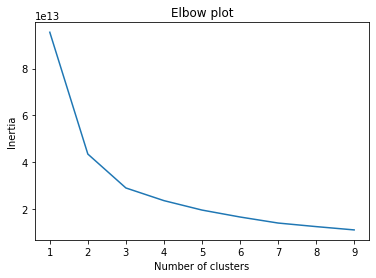

In [84]:
K = range(1, 10)
visualize_elbow(X, K)

In [85]:
X_reduced = X[['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']]

In [249]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=2022)
  kmeans.fit(X_reduced)

  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(X_reduced, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [86]:
km = KMeans(n_clusters=3, max_iter=50, random_state=2022)
km.fit(X_reduced)

KMeans(max_iter=50, n_clusters=3, random_state=2022)

In [87]:
# Size of each cluster
for i in range(len(km.cluster_centers_)):
  print("Cluster", i)
  print("Center:", km.cluster_centers_[i])
  print("Size:", sum(km.labels_ == i))

Cluster 0
Center: [4.03208053e+02 3.73392488e+01 1.70635968e-01 1.62165193e-01
 1.19335005e+01 1.19394841e+01 3.70880063e-01 5.46208823e-01
 3.46074680e-01 1.36372433e-01 2.64091569e-01 4.10069490e-01
 6.69930070e-01 7.27085807e-01 3.04134231e-01 2.90255970e-01
 8.25988477e-02 9.74471390e+02 2.27826763e+02 1.97325538e+03
 5.72284954e+02 8.35938932e+01]
Size: 454736
Cluster 1
Center: [2.84039157e+03 2.50792320e+02 1.65731576e+00 3.27010082e-01
 1.19234205e+01 1.19312289e+01 5.29706267e-01 7.72006982e-01
 6.79581104e-01 2.12123648e-01 5.08531796e-01 5.37388329e-01
 8.53443722e-01 8.92324828e-01 3.74675608e-01 4.05174196e-01
 1.74115242e-01 1.78465376e+04 1.87349395e+03 3.38078819e+03
 9.33770319e+02 8.41066073e+01]
Size: 87088
Cluster 2
Center: [7.67958316e+03 2.98130119e+02 2.91986573e+00 4.65486726e-01
 1.19179738e+01 1.19590479e+01 5.82422948e-01 8.52548062e-01
 8.19530058e-01 2.45224291e-01 6.28745804e-01 5.76136710e-01
 9.02776930e-01 9.45132743e-01 3.89563625e-01 3.92004883e-01
 2.

In [88]:
train_final['cluster_pca'] = km.labels_

In [89]:
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,0,0,0,0,2
1,PRV55912,50,0.0,0.0,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,0,0,0,0,1
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,1,0,0,0,1
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,0,0,0,0,1
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,1,0,0,0,1


In [90]:
train_final['cluster_pca'].unique()

array([2, 1, 0], dtype=int32)

In [91]:
train_final.loc[train_final['cluster_pca'] == 0].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.000000,454736.0
mean,403.204453,37.339577,0.170637,11.933500,11.939484,0.370879,0.546205,0.346073,0.136371,0.264085,0.410069,0.669927,0.727083,0.304133,0.290254,0.082595,974.399080,227.814675,1973.221496,572.275672,83.593975,0.007692,0.577792,0.098517,0.036006,0.021470,0.0
std,1002.583790,189.325185,1.197413,0.877174,0.779485,0.483041,0.497861,0.475717,0.343183,0.440845,0.491846,0.470240,0.445459,0.460040,0.453880,0.275270,2258.989144,593.321213,3039.931706,813.936374,12.982495,0.087368,0.493912,0.298012,0.186304,0.144944,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-60.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,0.000000,0.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,440.000000,120.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,80.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,320.000000,84.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,300.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2410.000000,730.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,17300.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9840.000000,36136.000000,44750.000000,13040.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [92]:
train_final.loc[train_final['cluster_pca'] == 1].describe()


,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.00000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.000000,87088.0
mean,2840.121371,250.774297,1.657209,11.923422,11.931299,0.529694,0.772012,0.679565,0.212130,0.508566,0.537399,0.853447,0.892327,0.374667,0.405165,0.174134,17845.721913,1873.47545,3380.708134,933.758405,84.106272,0.006155,0.586223,0.101679,0.032335,0.020129,1.0
std,5380.765130,450.510881,3.991277,0.939195,0.840693,0.499120,0.419537,0.466646,0.408819,0.499929,0.498602,0.353662,0.309968,0.484040,0.490927,0.379227,7203.742081,1386.67165,5704.944764,1479.526429,13.300229,0.078211,0.492512,0.302227,0.176890,0.140443,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.00000,-70.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,1068.00000,560.000000,150.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,200.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16000.000000,1068.00000,1490.000000,440.000000,85.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,2800.000000,60.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,22080.000000,2136.00000,3480.000000,1050.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,33000.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37880.000000,37204.00000,52900.000000,13840.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [93]:
train_final.loc[train_final['cluster_pca'] == 2].describe()


,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,cluster_pca
count,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.0
mean,7679.933484,298.158906,2.919876,11.917984,11.958687,0.582474,0.852566,0.819552,0.245194,0.628669,0.576066,0.902789,0.945139,0.389638,0.392079,0.247574,56207.274669,3095.962775,4882.924879,1288.550925,84.338805,0.005919,0.568621,0.121194,0.032099,0.018551,2.0
std,15595.960656,477.168843,6.314482,0.961665,0.649622,0.493166,0.354549,0.384572,0.430216,0.483175,0.494195,0.296254,0.227715,0.487683,0.488229,0.431616,19173.837626,2952.669423,8250.938820,1783.735416,13.353421,0.076711,0.495284,0.326362,0.176267,0.134938,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33000.000000,0.000000,-60.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,60.000000,0.000000,0.000000,12.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,43000.000000,1068.000000,650.000000,200.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,300.000000,0.000000,0.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,51080.000000,2136.000000,1860.000000,590.000000,85.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
75%,6000.000000,1068.000000,3.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,62000.000000,3204.000000,4775.000000,1470.000000,94.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
max,125000.000000,1068.000000,36.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,161470.000000,38272.000000,102960.000000,9950.000000,111.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [94]:
train_final.groupby('cluster_pca')['Provider'].nunique()


cluster_pca
0    5308
1    4507
2    2897
Name: Provider, dtype: int64

In [95]:
train_final['Provider'].nunique()

5410

In [97]:
df_InscClaimAmtReimbursed = train_final.groupby('cluster_pca')['InscClaimAmtReimbursed'].mean()\
                                       .reset_index(name='InscClaimAmtReimbursed_mean')\
                                       .sort_values(['InscClaimAmtReimbursed_mean'], ascending=False)

df_InscClaimAmtReimbursed.head()

,cluster_pca,InscClaimAmtReimbursed_mean
2,2,7679.933484
1,1,2840.121371
0,0,403.204453


In [98]:
df_DeductibleAmtPaid = train_final.groupby('cluster_pca')['DeductibleAmtPaid'].mean()\
                                       .reset_index(name='DeductibleAmtPaid_mean')\
                                       .sort_values(['DeductibleAmtPaid_mean'], ascending=False)

df_DeductibleAmtPaid.head()

,cluster_pca,DeductibleAmtPaid_mean
2,2,298.158906
1,1,250.774297
0,0,37.339577


In [104]:
df_ChronicCond_Heartfailure = train_final.groupby('cluster_pca')['ChronicCond_Heartfailure'].mean()\
                                       .reset_index(name='ChronicCond_Heartfailure_mean')\
                                       .sort_values(['ChronicCond_Heartfailure_mean'], ascending=False)

df_ChronicCond_Heartfailure.head()

,cluster_pca,ChronicCond_Heartfailure_mean
2,2,0.852566
1,1,0.772012
0,0,0.546205


In [109]:
df_ChronicCond_KidneyDisease = train_final.groupby('cluster_pca')['ChronicCond_KidneyDisease'].mean()\
                                       .reset_index(name='ChronicCond_KidneyDisease_mean')\
                                       .sort_values(['ChronicCond_KidneyDisease_mean'], ascending=False)

df_ChronicCond_KidneyDisease.head()

,cluster_pca,ChronicCond_KidneyDisease_mean
2,2,0.819552
1,1,0.679565
0,0,0.346073


In [110]:
df_ChronicCond_ObstrPulmonary = train_final.groupby('cluster_pca')['ChronicCond_ObstrPulmonary'].mean()\
                                       .reset_index(name='ChronicCond_ObstrPulmonary_mean')\
                                       .sort_values(['ChronicCond_ObstrPulmonary_mean'], ascending=False)

df_ChronicCond_ObstrPulmonary.head()

,cluster_pca,ChronicCond_ObstrPulmonary_mean
2,2,0.628669
1,1,0.508566
0,0,0.264085


In [112]:
df_IPAnnualReimbursementAmt = train_final.groupby('cluster_pca')['IPAnnualReimbursementAmt'].mean()\
                                       .reset_index(name='IPAnnualReimbursementAmt_mean')\
                                       .sort_values(['IPAnnualReimbursementAmt_mean'], ascending=False)

df_IPAnnualReimbursementAmt.head()

,cluster_pca,IPAnnualReimbursementAmt_mean
2,2,56207.274669
1,1,17845.721913
0,0,974.399080


In [114]:
df_IPAnnualDeductibleAmt = train_final.groupby('cluster_pca')['IPAnnualDeductibleAmt'].mean()\
                                       .reset_index(name='IPAnnualDeductibleAmt_mean')\
                                       .sort_values(['IPAnnualDeductibleAmt_mean'], ascending=False)

df_IPAnnualDeductibleAmt.head()

,cluster_pca,IPAnnualDeductibleAmt_mean
2,2,3095.962775
1,1,1873.475450
0,0,227.814675


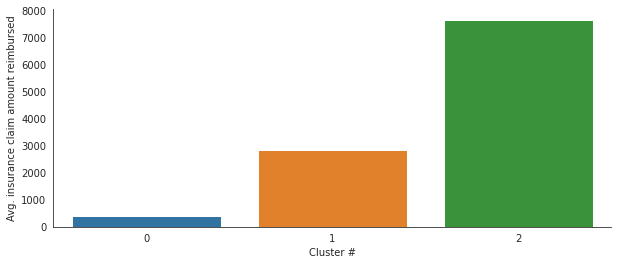

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("white")
plt.figure(figsize=(10,4)) 

sns.barplot(x='cluster_pca', y='InscClaimAmtReimbursed_mean', data=df_InscClaimAmtReimbursed)
plt.ylabel('Avg. insurance claim amount reimbursed')
plt.xlabel('Cluster #')
sns.despine()

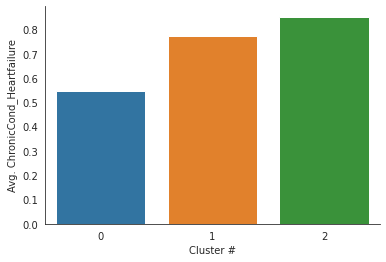

In [105]:
sns.barplot(x='cluster_pca', y='ChronicCond_Heartfailure_mean', data=df_ChronicCond_Heartfailure)
plt.ylabel('Avg. ChronicCond_Heartfailure')
plt.xlabel('Cluster #')
sns.despine()

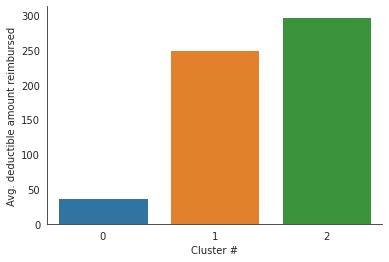

In [106]:
sns.barplot(x='cluster_pca', y='DeductibleAmtPaid_mean', data=df_DeductibleAmtPaid)
plt.ylabel('Avg. deductible amount reimbursed')
plt.xlabel('Cluster #')
sns.despine()

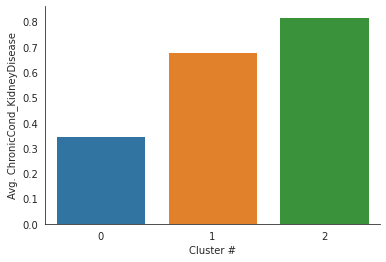

In [108]:
sns.barplot(x='cluster_pca', y='ChronicCond_KidneyDisease_mean', data=df_ChronicCond_KidneyDisease)
plt.ylabel('Avg. ChronicCond_KidneyDisease')
plt.xlabel('Cluster #')
sns.despine()

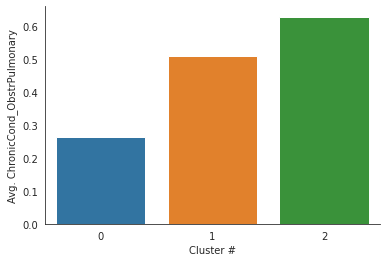

In [111]:
sns.barplot(x='cluster_pca', y='ChronicCond_ObstrPulmonary_mean', data=df_ChronicCond_ObstrPulmonary)
plt.ylabel('Avg. ChronicCond_ObstrPulmonary')
plt.xlabel('Cluster #')
sns.despine()

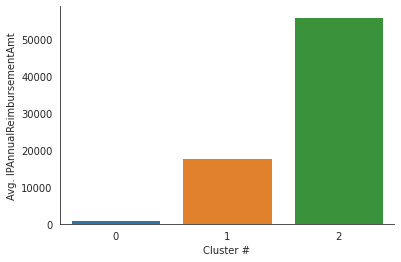

In [113]:
sns.barplot(x='cluster_pca', y='IPAnnualReimbursementAmt_mean', data=df_IPAnnualReimbursementAmt)
plt.ylabel('Avg. IPAnnualReimbursementAmt')
plt.xlabel('Cluster #')
sns.despine()

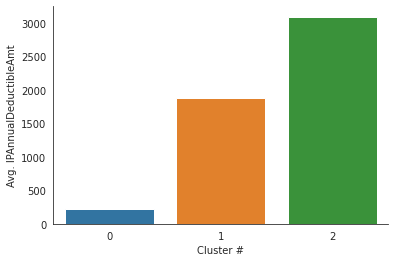

In [115]:
sns.barplot(x='cluster_pca', y='IPAnnualDeductibleAmt_mean', data=df_IPAnnualDeductibleAmt)
plt.ylabel('Avg. IPAnnualDeductibleAmt')
plt.xlabel('Cluster #')
sns.despine()
